In [1]:
from matplotlib import pyplot as plt
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
import cv2
import numpy as np

In [ ]:
import os

class ModelHandler:
    def __init__(self):
        self.prototxt = os.getenv("PROTOTXT_DIR") 
        self.model = os.getenv("MODEL_DIR")
        self.min_conf = 0.8
        self.load()

    def load(self):
        self.net = cv2.dnn.readNetFromCaffe(self.prototxt, self.model)

    def inference(self, roi):
        blob = cv2.dnn.blobFromImage(cv2.resize(roi, (416, 416)), 0.013843, (416, 416), (110, 110, 110), swapRB=True)
        self.net.setInput(blob)
        detections = self.net.forward()

        for i in np.arange(0, detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            if confidence > self.min_conf:
                idx = int(detections[0, 0, i, 1])
                if idx == 8:
                    return "cat"
        return "it's not a cat"
            


In [4]:
img = cv2.imread("images/dog.jpg")

In [5]:
model = ModelHandler()

In [6]:
result = model.inference(img)
print(result)

it's not a cat


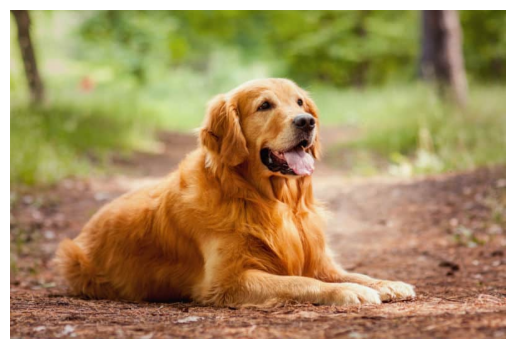

In [7]:

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Exibe a imagem
plt.imshow(img_rgb)
plt.axis('off')  # Remove os eixos
plt.show()


In [8]:
# labels = ["background", "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow",
#              "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"]
# colors = np.random.uniform(0, 255, size=(len(labels), 3))
# roi = img_rgb

# (h, w) = roi.shape[:2]
# blob = cv2.dnn.blobFromImage(cv2.resize(roi, (416, 416)), 0.013843, (416, 416), (110, 110, 110), swapRB=True)
# nn.setInput(blob)
# detections = nn.forward()

# for i in np.arange(0, detections.shape[2]):
#     confidence = detections[0, 0, i, 2]
#     if confidence > min_conf:
#         print(F"confidence: {confidence}")
#         idx = int(detections[0, 0, i, 1])
#         if idx == 8:
#             box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
#             (startX, startY, endX, endY) = box.astype("int")
#             cv2.rectangle(roi, (startX, startY), (endX, endY), colors[idx], 25)


In [12]:
import cv2
import base64
import requests

img = cv2.imread("cat.jpg")
_, buffer = cv2.imencode('.jpg', img)
img_base64 = base64.b64encode(buffer).decode('utf-8')


url = "http://127.0.0.1:8000/"
payload = {
    "image": f"data:image/jpeg;base64,{img_base64}"
}

response = requests.post(url, json=payload)
print(response.json())

{'result': 'cat'}
